In [6]:
#导入相关库
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import math
import time
from sklearn.preprocessing import StandardScaler

## 探索数据和数据预处理

In [12]:
#读取路劲下的目录,并删除无用文件名
path = os.listdir('./WeatherData')
#path.remove('.DS_Store')
#path.remove('.ipynb_checkpoints')
print(path)
city_name = ['torino','ferrara','bologna','piacenza','milano','mantova','asti','ravenna','cesena','faenza']

['asti_270615.csv', 'bologna_270615.csv', 'cesena_270615.csv', 'faenza_270615.csv', 'ferrara_270615.csv', 'mantova_270615.csv', 'milano_270615.csv', 'piacenza_270615.csv', 'ravenna_270615.csv', 'torino_270615.csv']


In [13]:
#读取目录下的文件并存储在列表中
city_list = []
for x in path:
    # 读取文件
    city_list.append(pd.read_csv('./WeatherData/%s'%x))

In [14]:
#查看数据类型
city_list[0].dtypes

Unnamed: 0       int64
temp           float64
humidity         int64
pressure         int64
description     object
dt               int64
wind_speed     float64
wind_deg       float64
city            object
day             object
dist             int64
dtype: object

In [15]:
#查看数据的列
city_list[0].columns

Index(['Unnamed: 0', 'temp', 'humidity', 'pressure', 'description', 'dt',
       'wind_speed', 'wind_deg', 'city', 'day', 'dist'],
      dtype='object')

In [16]:
#查看前五行数据
city_list[0].head()

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,22.68,60,1018,Sky is Clear,1435390925,2.10,80.000,Asti,2015-06-27 09:42:05,315
1,1,24.05,60,1018,Sky is Clear,1435394243,2.60,50.000,Asti,2015-06-27 10:37:23,315
2,2,26.56,57,1018,Sky is Clear,1435399017,2.10,100.000,Asti,2015-06-27 11:56:57,315
3,3,27.20,57,1017,Sky is Clear,1435402420,2.10,70.000,Asti,2015-06-27 12:53:40,315
4,4,28.56,29,1017,Sky is Clear,1435406056,2.06,154.505,Asti,2015-06-27 13:54:16,315


In [17]:
#将时间戳转换为正常时间格式
for city in city_list:
    d = list(city['dt'])
    d_new = []
    for i in range(len(city)):
        dt = time.localtime(int(d[i]))
        dt_new = time.strftime('%Y-%m-%d %H:%M:%S', dt)
        d_new.append(dt_new)
    city['dt'] = d_new 

In [22]:
#删除重复内容 #删除无用列
for index,city in enumerate(city_list):
    city.drop_duplicates()
    city.drop(labels="Unnamed: 0",axis=1,inplace=True)
    print(index)
    city.to_csv("./midata/{}".format(path[index]))

KeyError: "['Unnamed: 0'] not found in axis"

In [9]:
#用列表存储距离,最高温度等数据
dists = []#距离
temp_max = []#最高温度
temp_min = []#最低温度
hum_max = []#最高湿度
hum_min = []#最低湿度
for city in city_list:
    dists.append(city['dist'][0])
    temp_max.append(city['temp'].max())
    temp_min.append(city['temp'].min())
    hum_max.append(city['humidity'].max())
    hum_min.append(city['humidity'].min())      

In [10]:
#查看数据
print('距离:',dists)
print('最高温度:',temp_max)
print('最低温度:',temp_min)
print('最高湿度:',hum_max)
print('最低湿度:',hum_min)

距离: [357, 47, 71, 200, 250, 121, 315, 8, 14, 37]
最高温度: [31.32000000000005, 30.33000000000004, 30.96000000000004, 30.890000000000043, 30.600000000000023, 30.57000000000005, 31.44, 28.470000000000027, 27.410000000000025, 29.33000000000004]
最低温度: [18.94, 18.81, 18.44, 18.680000000000007, 18.28000000000003, 19.03000000000003, 18.010000000000048, 18.220000000000027, 18.410000000000025, 18.620000000000005]
最高湿度: [82, 84, 92, 82, 77, 100, 84, 88, 94, 94]
最低湿度: [45, 39, 40, 40, 35, 28, 29, 54, 61, 61]


# 可视化与建模

## 探索温度和距离的关系

#### 最高温度和海洋距离的关系

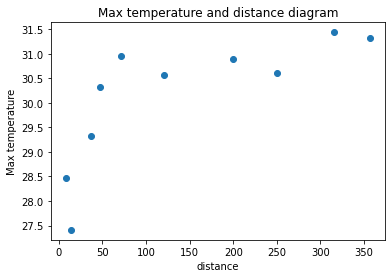

In [11]:

plt.title('Max temperature and distance diagram')
plt.xlabel('distance')
plt.ylabel('Max temperature')
plt.scatter(dists,temp_max)
plt.show()

**可以看到随着城市与海洋距离的增加,温度有这两种不同的变化,一种是 小于 100 ,温度上升的很快,另一种是 大于 50,温度趋于平稳,上升较慢,那么选择对温度与城市距离进行建模**

**建模**

In [12]:
#将 x,y 转化为 np数组
x = np.array(dists)
y = np.array(temp_max)

In [13]:
#查看 x 和 y 数据
print (x,y)

[357  47  71 200 250 121 315   8  14  37] [31.32 30.33 30.96 30.89 30.6  30.57 31.44 28.47 27.41 29.33]


In [14]:
# 将 x,y分为两组
x1 = x[x<100]
y1 = y[x<100]
x2 = x[x>50]
y2 = y[x>50]

In [15]:
#查看 x12 和 y12 数据
print(x1,y1)
print(x2,y2)

[47 71  8 14 37] [30.33 30.96 28.47 27.41 29.33]
[357  71 200 250 121 315] [31.32 30.96 30.89 30.6  30.57 31.44]


In [16]:
#对 x12 和 y12 数据进行 reshape 操作,使其能够被放入模型
x1 = x1.reshape(5,1)
y1 = y1.reshape(5)
x2 = x2.reshape(6,1)
y2 = y2.reshape(6)

In [17]:
#使用线性支持向量机进行回归预测,需要建立两个模型,有两种关系
svr1 = SVR(kernel='linear')
svr2 = SVR(kernel='linear')
print(svr1,svr2)

SVR(kernel='linear') SVR(kernel='linear')


In [18]:
#对两个模型进行训练
svr1.fit(x1,y1)
svr2.fit(x2,y2)

SVR(kernel='linear')

In [19]:
#预测最高温度与距离回归关系
x_test1 = np.linspace(0,100,20).reshape(20,1)
x_test2 = np.linspace(50,350,20).reshape(20,1)
y1_ = svr1.predict(x_test1)
y2_ = svr2.predict(x_test2)

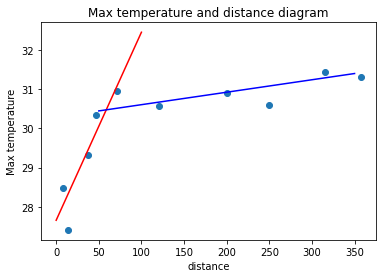

In [20]:
plt.title('Max temperature and distance diagram')
plt.xlabel('distance')
plt.ylabel('Max temperature')
plt.scatter(dists,temp_max)
plt.plot(x_test1,y1_,'r')
plt.plot(x_test2,y2_,'b')

#### 最低温度和海洋距离的关系

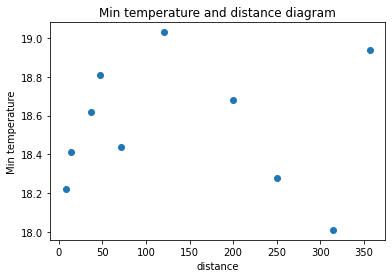

In [21]:
plt.title('Min temperature and distance diagram')
plt.xlabel('distance')
plt.ylabel('Min temperature')
plt.scatter(dists,temp_min)
plt.show()

**可以看到随着城市与海洋距离的增加,最低温度有这两种不同的变化,一种是 小于 150 ,温度上升的很快,另一种是大于 100,温度下降很快,那么选择对最低温度与城市距离进行建模**

**建模**

In [22]:
#将 x,y 转化为 np数组
x = np.array(dists)
y = np.array(temp_min)

In [23]:
#查看 x 和 y 数据
print (x,y)

[357  47  71 200 250 121 315   8  14  37] [18.94 18.81 18.44 18.68 18.28 19.03 18.01 18.22 18.41 18.62]


In [24]:
# 将 x,y分为两组
x1 = x[x<150]
y1 = y[x<150]
x2 = x[x>100]
y2 = y[x>100]

In [25]:
#查看 x12 和 y12 数据
print(x1,y1)
print(x2,y2)

[ 47  71 121   8  14  37] [18.81 18.44 19.03 18.22 18.41 18.62]
[357 200 250 121 315] [18.94 18.68 18.28 19.03 18.01]


In [26]:
#对 x12 和 y12 数据进行 reshape 操作,使其能够被放入模型
x1 = x1.reshape(6,1)
y1 = y1.reshape(6)
x2 = x2.reshape(5,1)
y2 = y2.reshape(5)

In [27]:
#使用线性支持向量机进行回归预测,需要建立两个模型,有两种关系
svr1 = SVR(kernel='linear')
svr2 = SVR(kernel='linear')
print(svr1,svr2)

SVR(kernel='linear') SVR(kernel='linear')


In [28]:
#对两个模型进行训练
svr1.fit(x1,y1)
svr2.fit(x2,y2)

SVR(kernel='linear')

In [29]:
#预测最低温度与距离回归关系
x_test1 = np.linspace(0,150,20).reshape(20,1)
x_test2 = np.linspace(100,350,20).reshape(20,1)
y1_ = svr1.predict(x_test1)
y2_ = svr2.predict(x_test2)

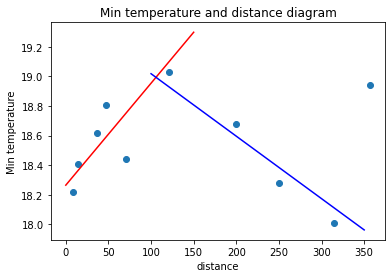

In [30]:
plt.title('Min temperature and distance diagram')
plt.xlabel('distance')
plt.ylabel('Min temperature')
plt.scatter(dists,temp_min)
plt.plot(x_test1,y1_,'r')
plt.plot(x_test2,y2_,'b')

#### 平均温度与距离的关系

In [31]:
temp_mean = []
for city in city_list:
    temp_mean.append(city['temp'].mean())

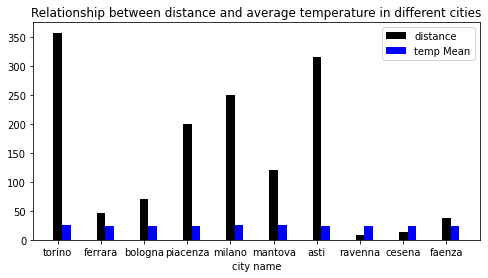

In [32]:
width = 0.2
plt.figure(figsize=(8,4))
x1 = range(0, 10)
x2 = [i + 0.2 for i in range(0, 10)]
x3 = [i + 0.2 for i in x2]

plt.title('Relationship between distance and average temperature in different cities')
plt.xlabel('city name')
plt.bar(x1, dists, width=width, color='black', label='distance')
plt.bar(x2, temp_mean, width=width, color='blue', label='temp Mean')
plt.xticks(range(10),city_name)
plt.legend()
plt.show()

### 探索湿度与海洋关系

#### 最高湿度和海洋距离的关系

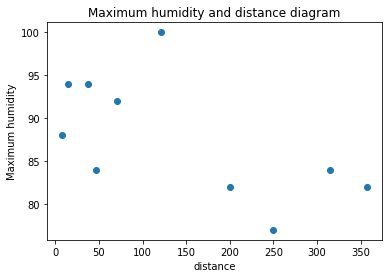

In [33]:
plt.title('Maximum humidity and distance diagram')
plt.xlabel('distance')
plt.ylabel('Maximum humidity')
plt.scatter(dists,hum_max)
plt.show()

#### 最低湿度与海洋距离的关系

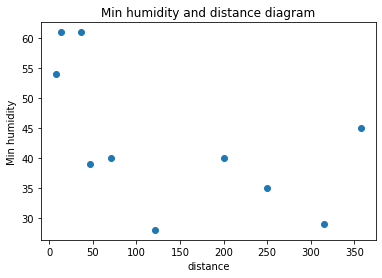

In [34]:

plt.title('Min humidity and distance diagram')
plt.xlabel('distance')
plt.ylabel('Min humidity')
plt.scatter(dists,hum_min)
plt.show()

#### 平均湿度与海洋距离的关系

In [35]:
#将平均湿度存储在列表中
humidity_mean = []
for city in city_list:
    humidity_mean.append(city['humidity'].mean())

In [36]:
#查看平均湿度
humidity_mean

[63.65,
 63.85,
 67.2,
 59.85,
 54.27777777777778,
 63.15,
 62.55,
 70.11111111111111,
 78.25,
 78.05263157894737]

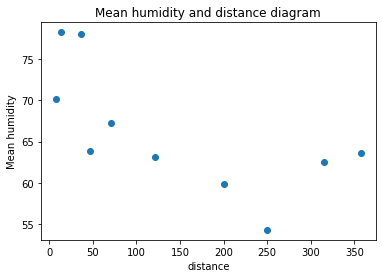

In [37]:
plt.title('Mean humidity and distance diagram')
plt.xlabel('distance')
plt.ylabel('Mean humidity')
plt.scatter(dists,humidity_mean)
plt.show()

**可以看到随着城市与海洋距离的增加,平均有这两种不同的变化,一种是 小于 300 ,湿度下降的很快,另一种是大于 200,湿度上升很快,那么选择对平均湿度与城市距离进行建模**

In [38]:
x_ = np.array(dists)
y_ = np.array(humidity_mean)
x3 = x_[x_<300]
y3 = y_[x_<300]
x4 = x_[x_>200]
y4 = y_[x_>200]

In [39]:
x3 = x3.reshape(8,1)
y3 = y3.reshape(8)
x4 = x4.reshape(3,1)
y4 = y4.reshape(3)

In [40]:
svr3 = SVR(kernel='linear')
svr4 = SVR(kernel='linear')
svr3.fit(x3,y3)
svr4.fit(x4,y4)

SVR(kernel='linear')

In [41]:
#预测平均湿度与距离回归关系
x_test3 = np.linspace(0,300,20).reshape(20,1)
x_test4 = np.linspace(200,350,20).reshape(20,1)
y3_ = svr3.predict(x_test3)
y4_ = svr4.predict(x_test4)

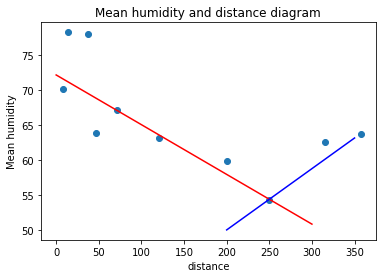

In [42]:
plt.title('Mean humidity and distance diagram')
plt.xlabel('distance')
plt.ylabel('Mean humidity')
plt.scatter(dists,humidity_mean)
plt.plot(x_test3,y3_,'r')
plt.plot(x_test4,y4_,'b')

## 探索风速与风向的关系

In [43]:
#画图函数
def Wind_Speed(speeds,city_name):
   speeds = np.array([0 if math.isnan(i) else i for i in list(speeds)])
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(speeds)
   plt.figure(figsize=(9, 9))
   plt.axes([0,0,2,2], polar=True)
   colors = np.random.random(size = 24).reshape(8,3)
   bars = plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

In [44]:
#读取风速函数
def Speed(city):
   degs = np.arange(45,361,45)
   tmp = []
   for deg in degs:
      tmp.append(city[(city['wind_deg']>(deg-46))&(city['wind_deg']<deg)]['wind_speed'].mean())
   return np.array(tmp)

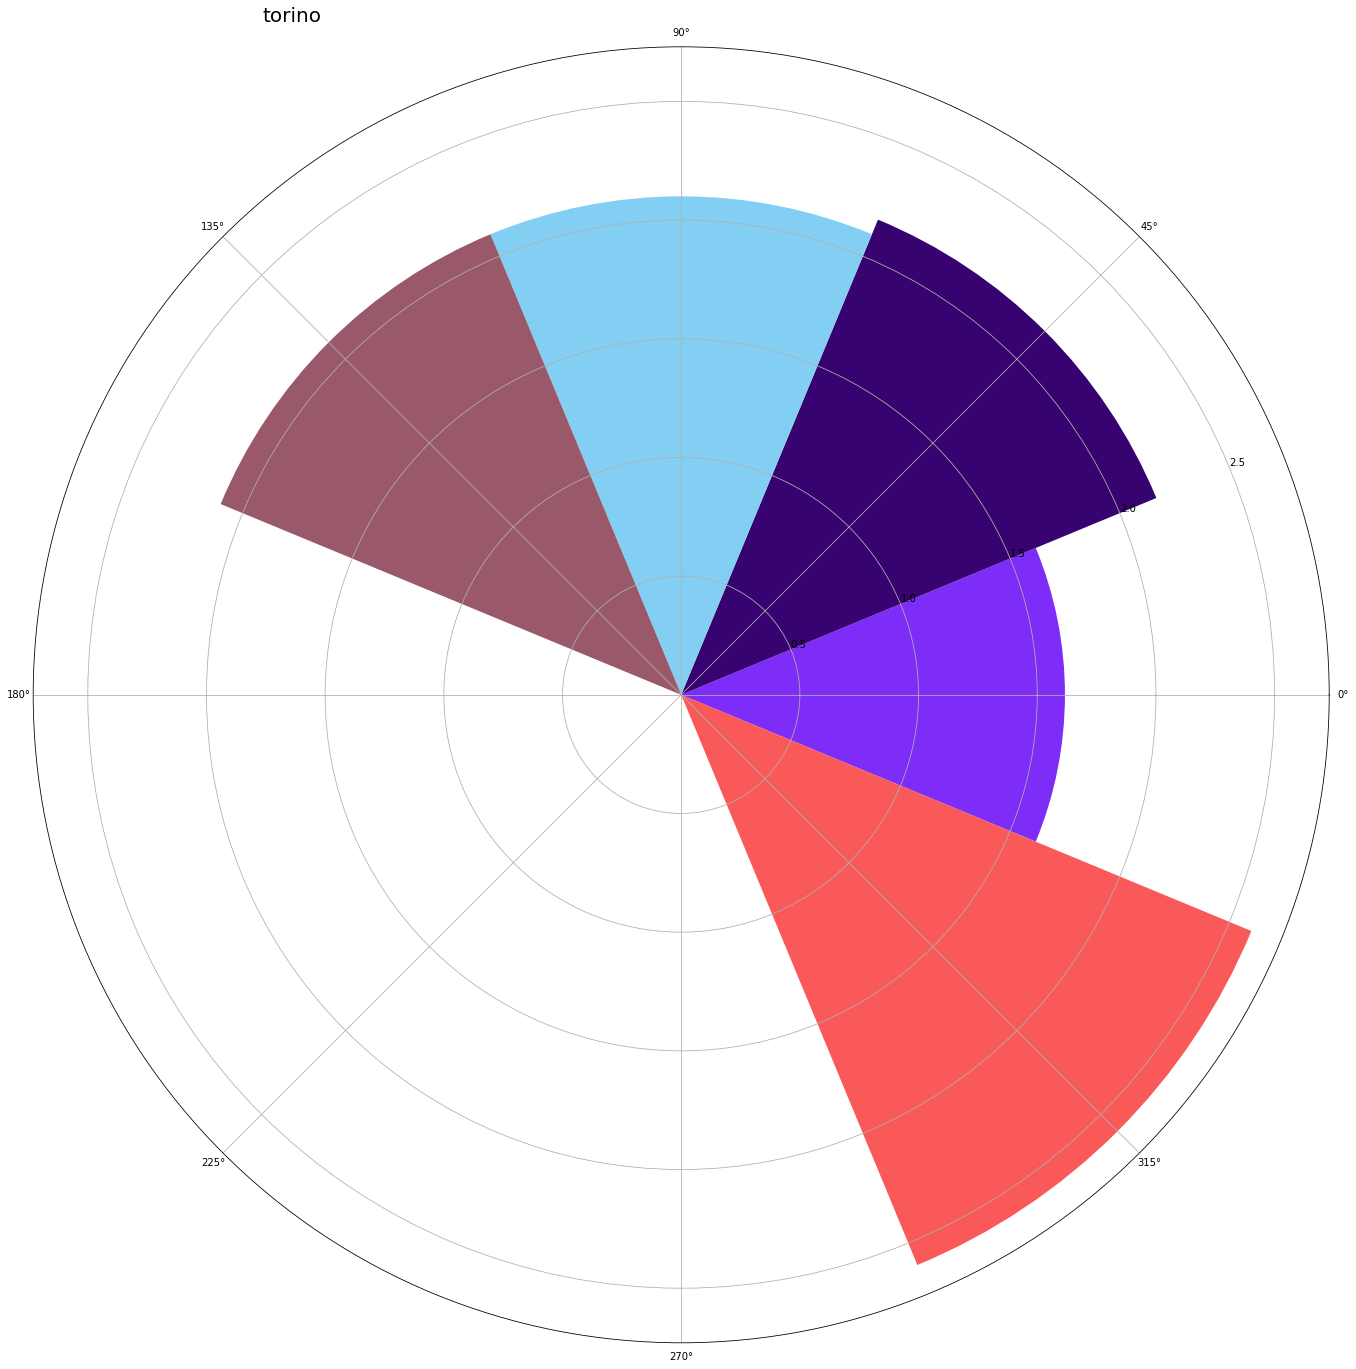

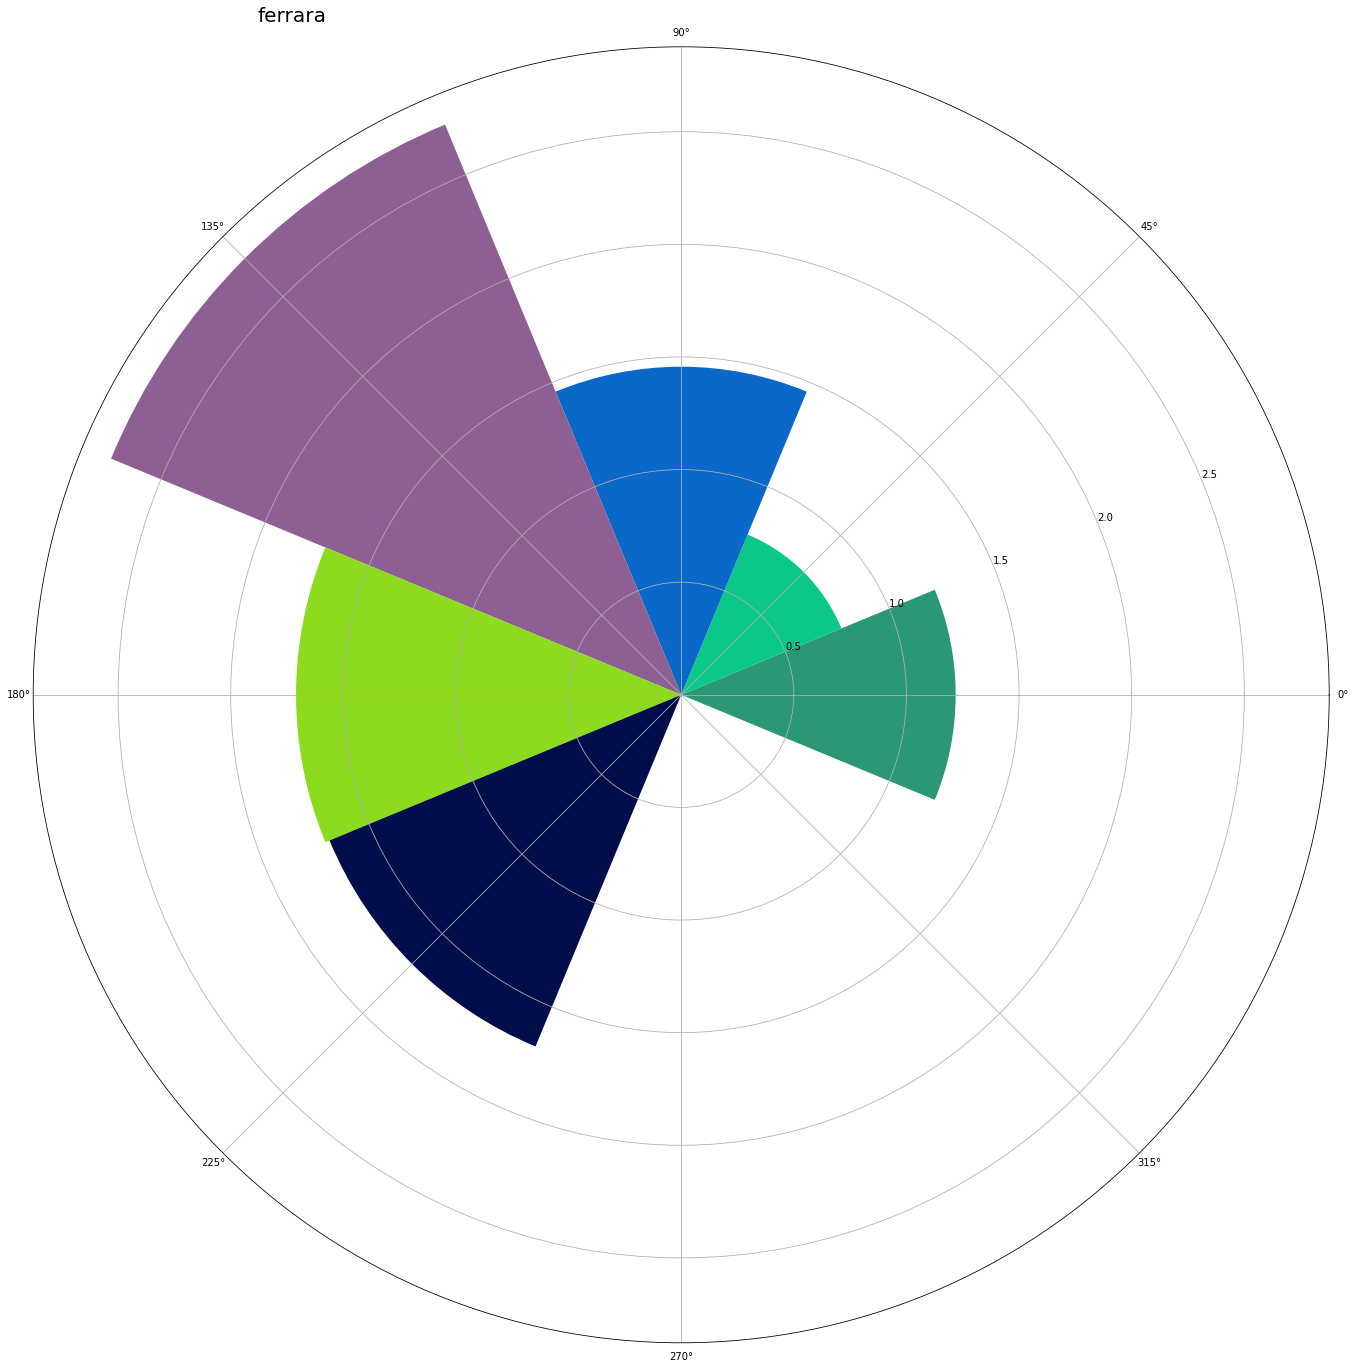

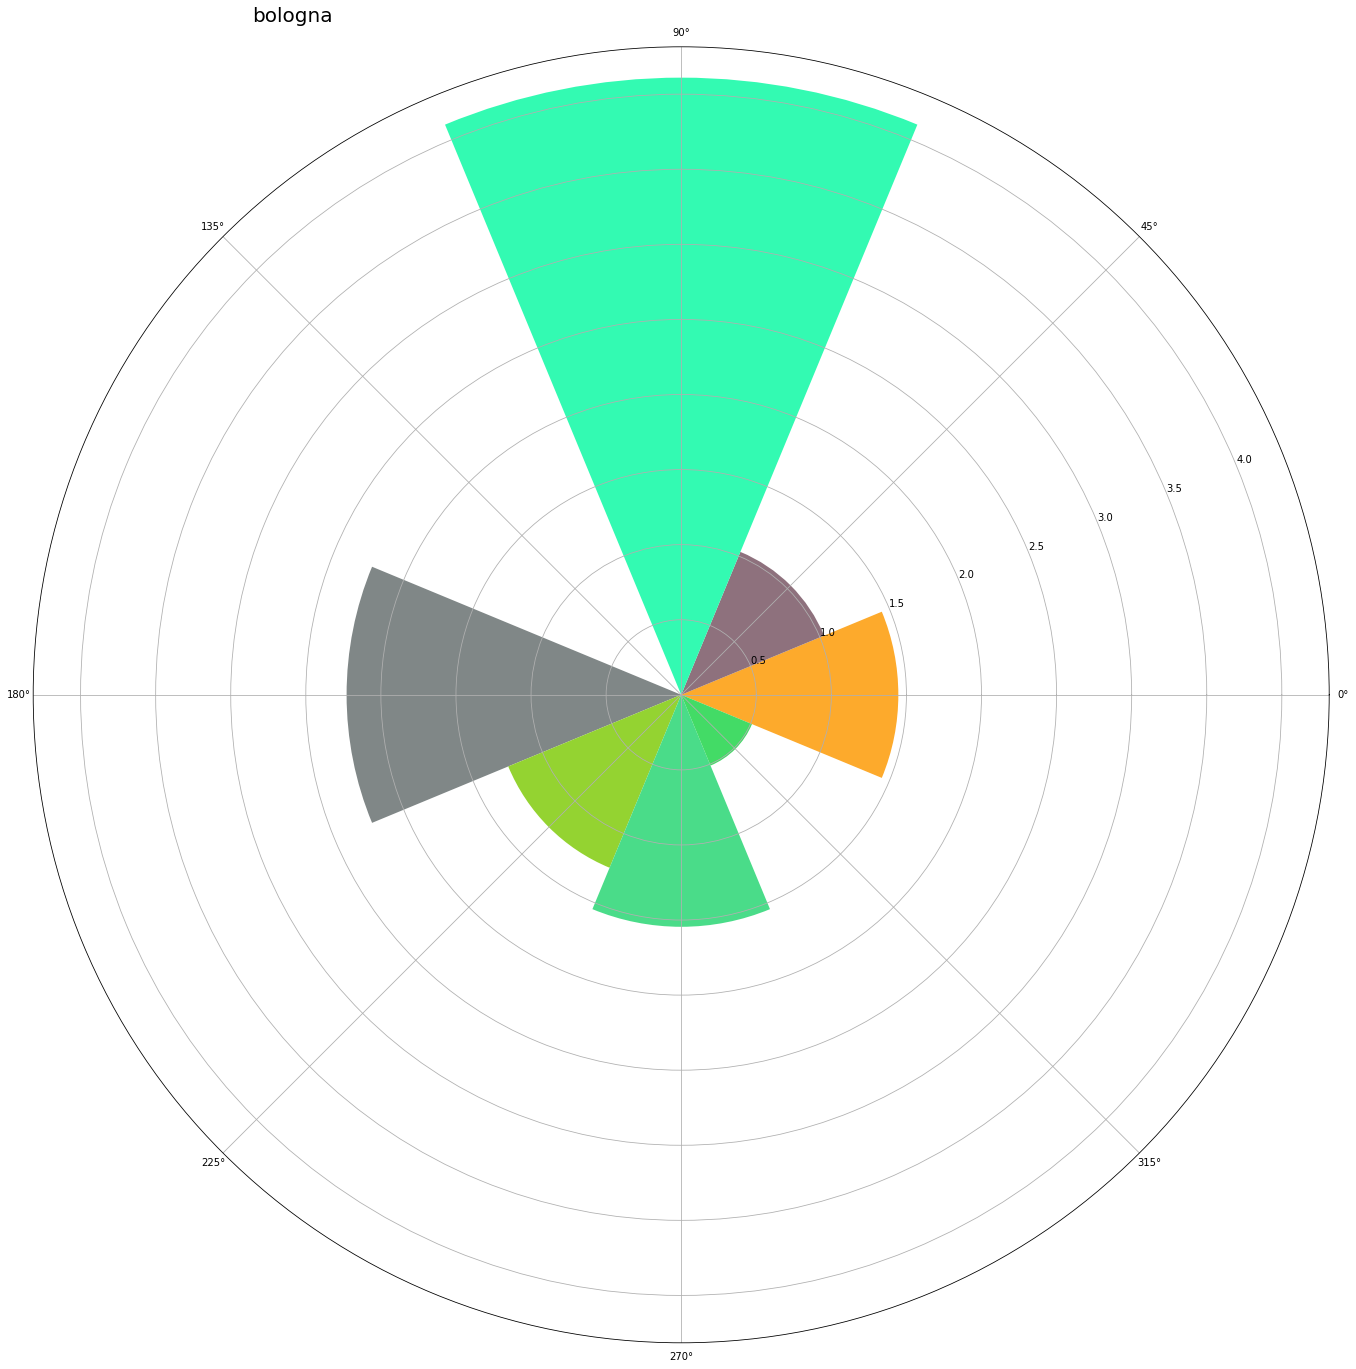

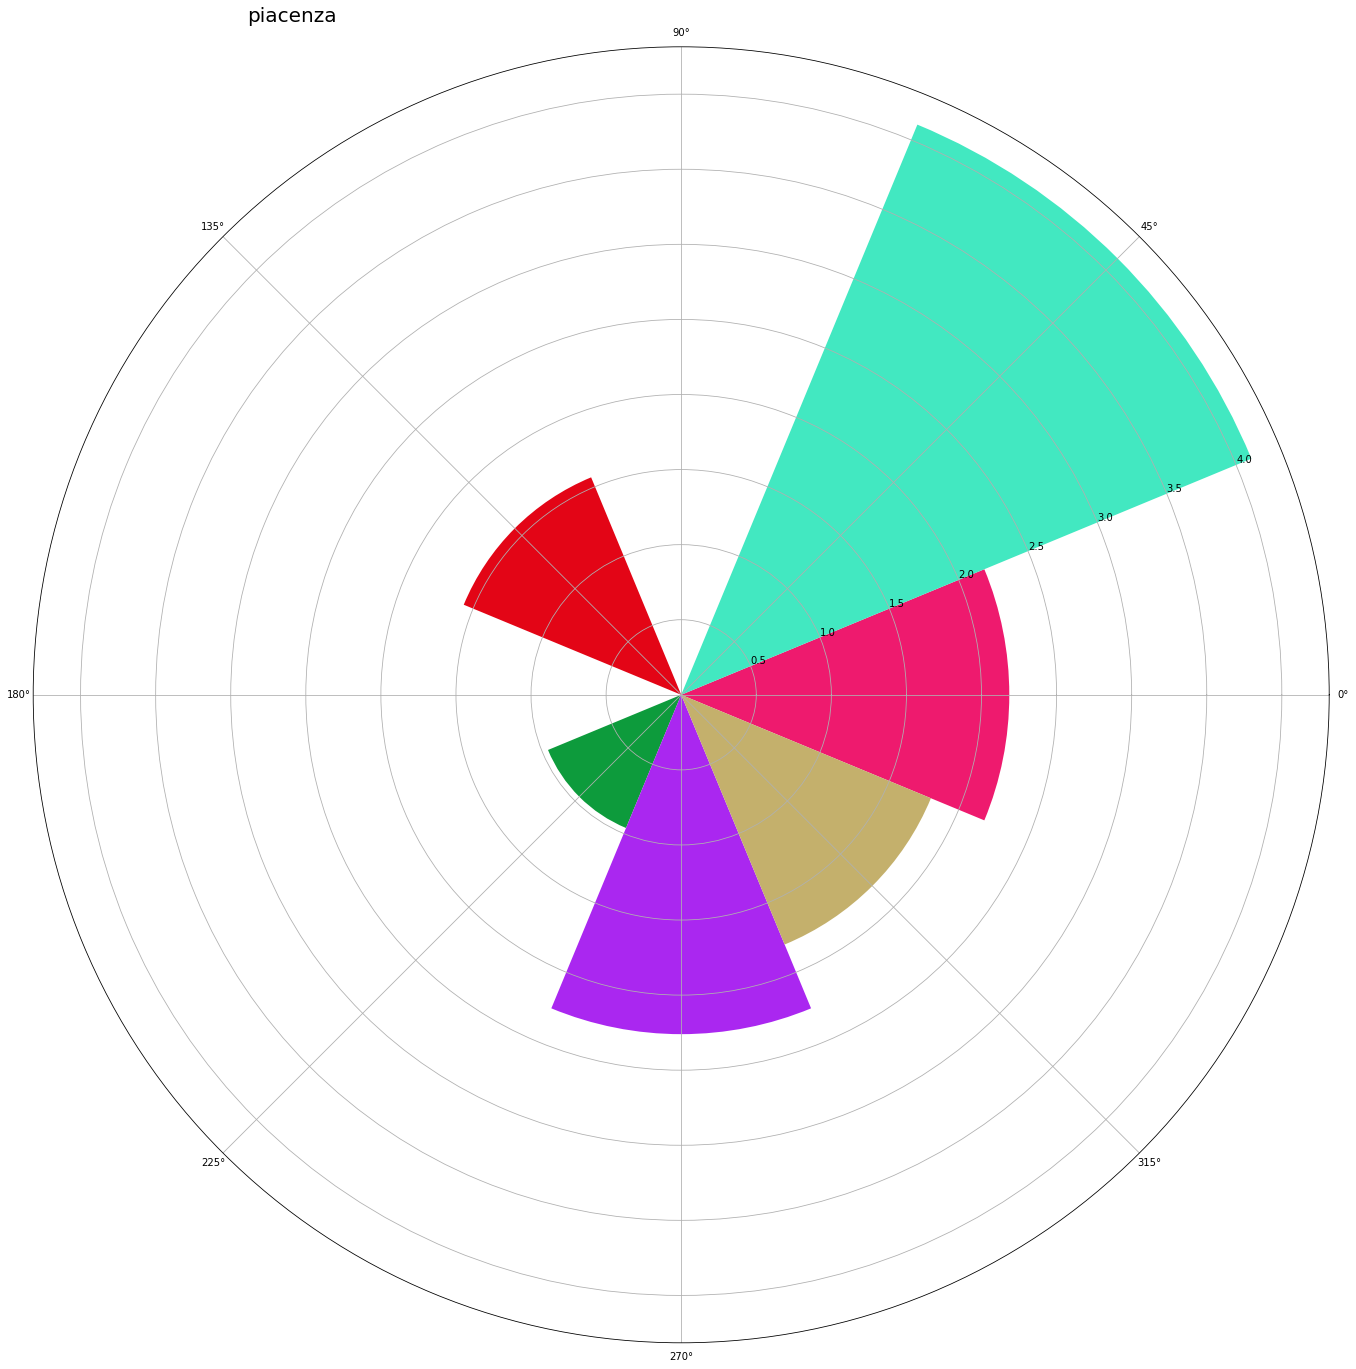

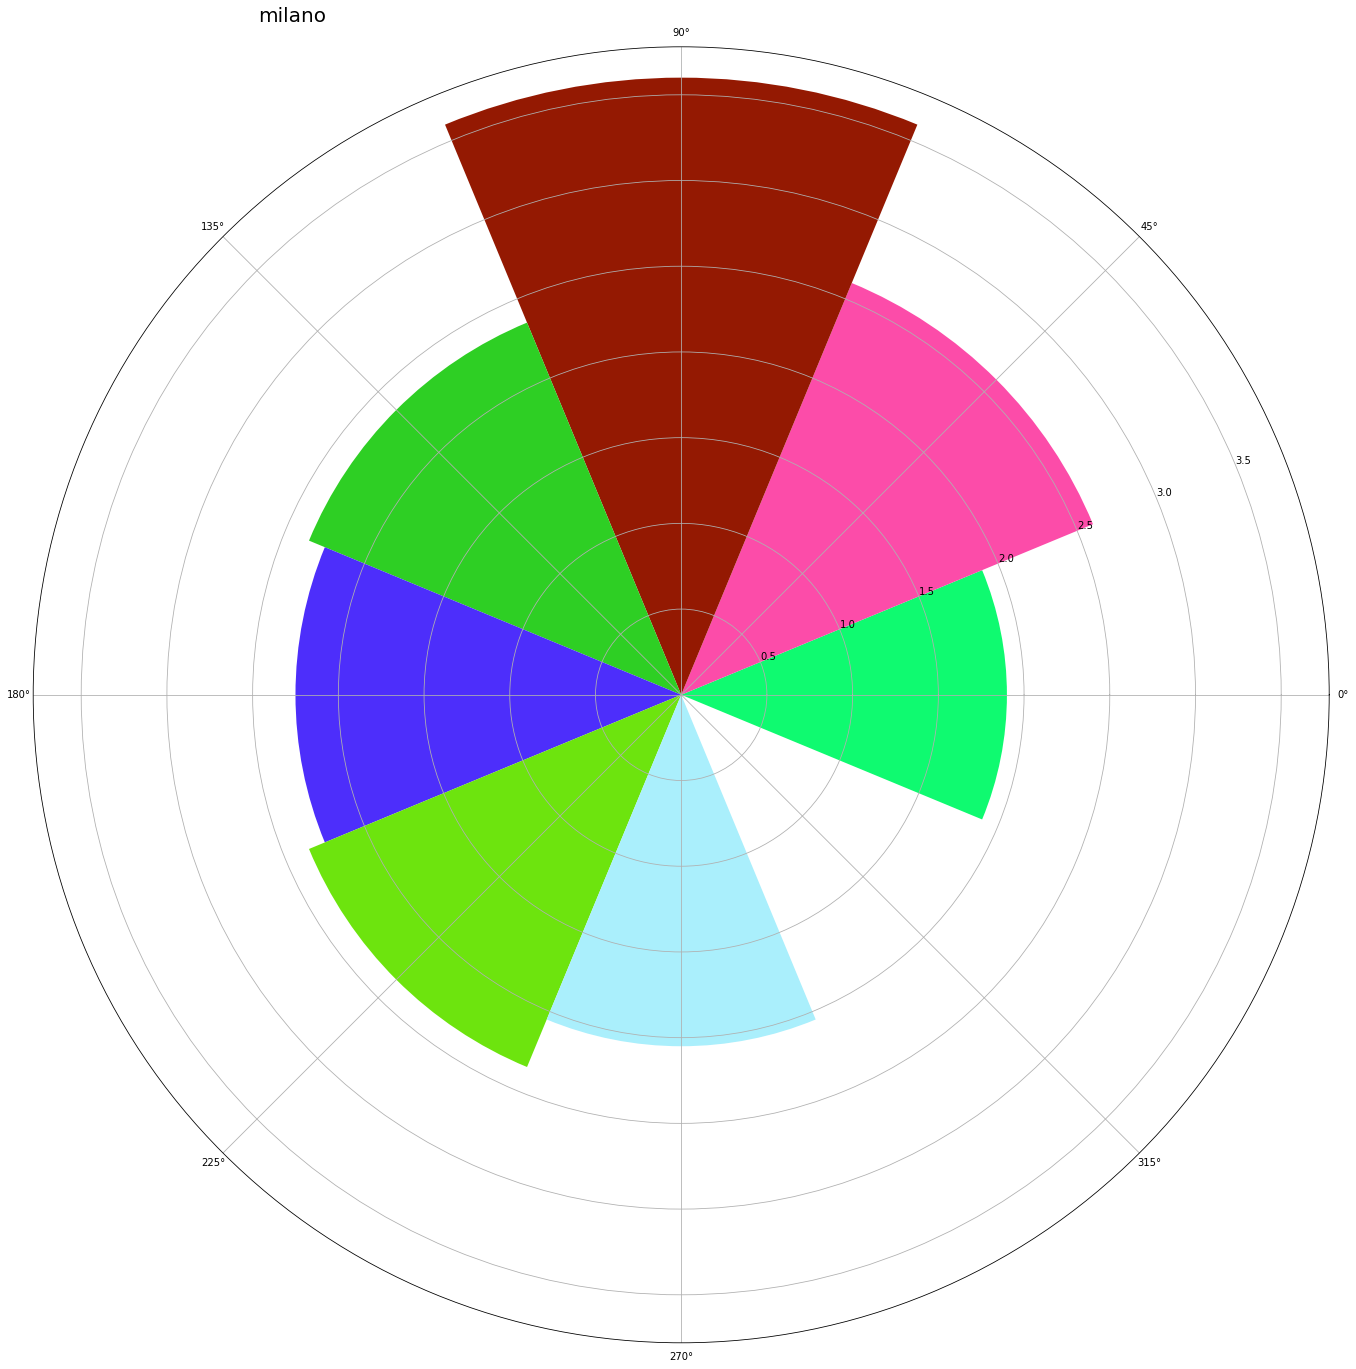

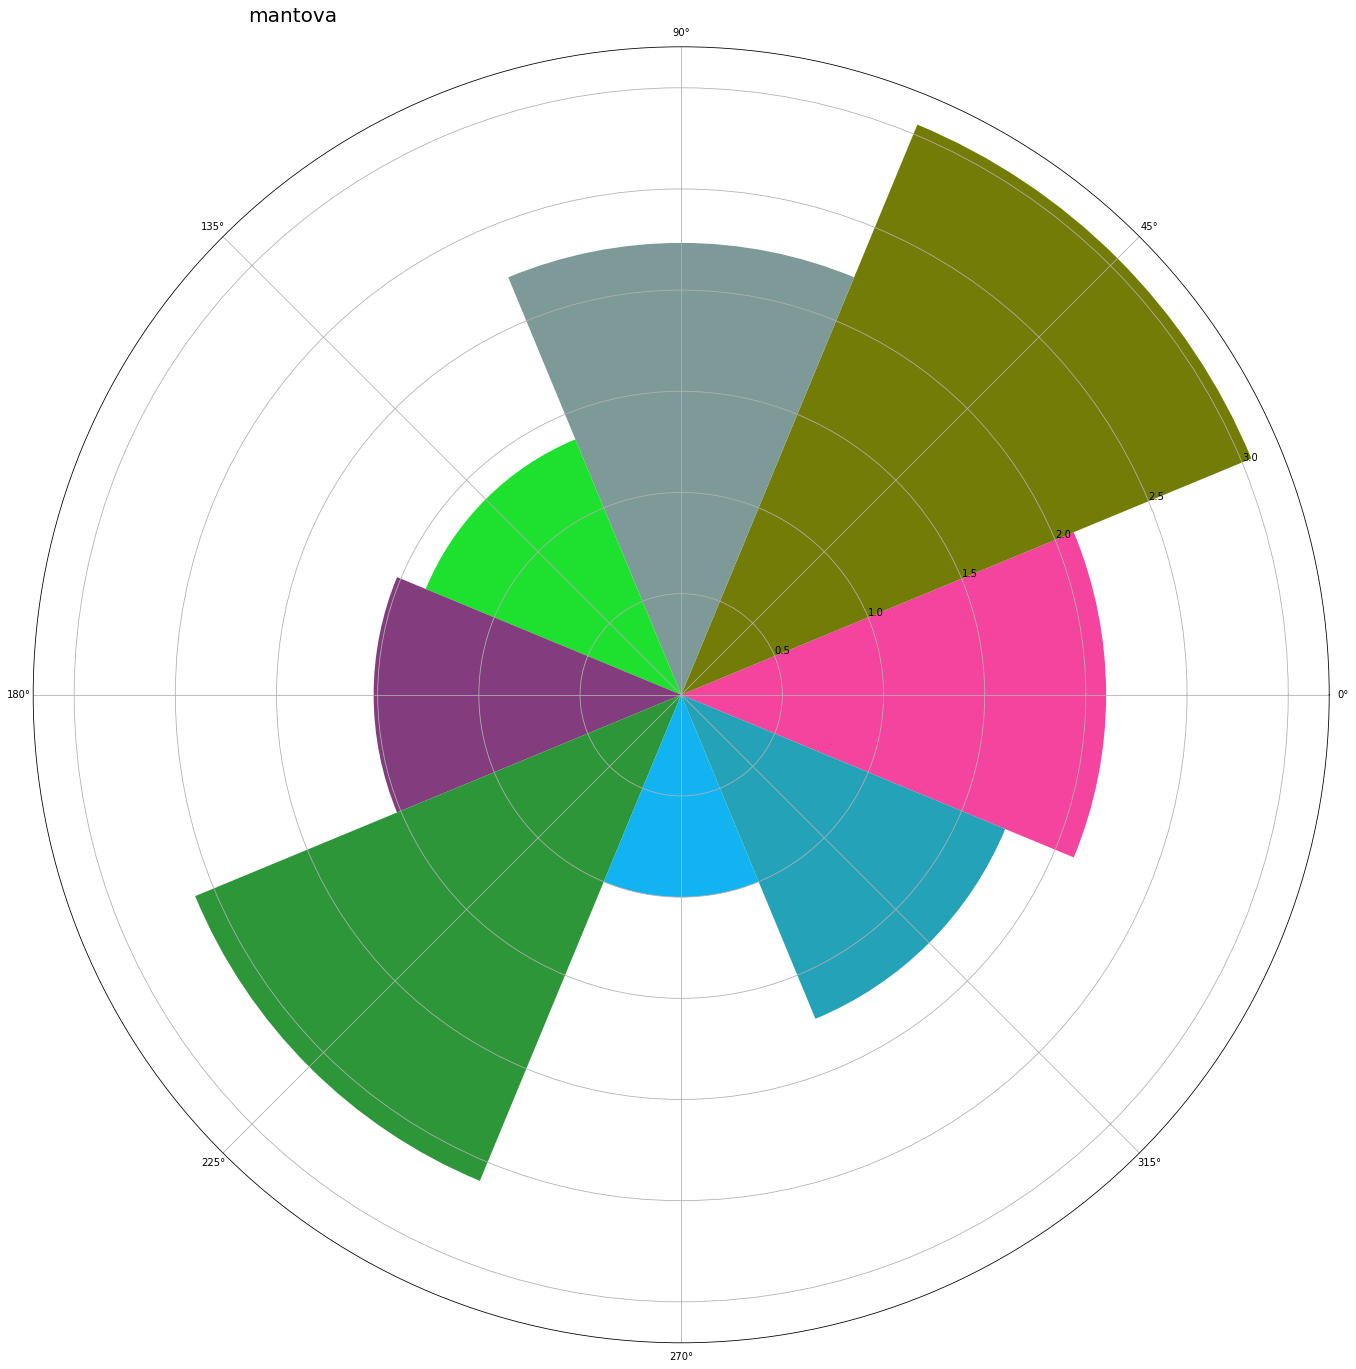

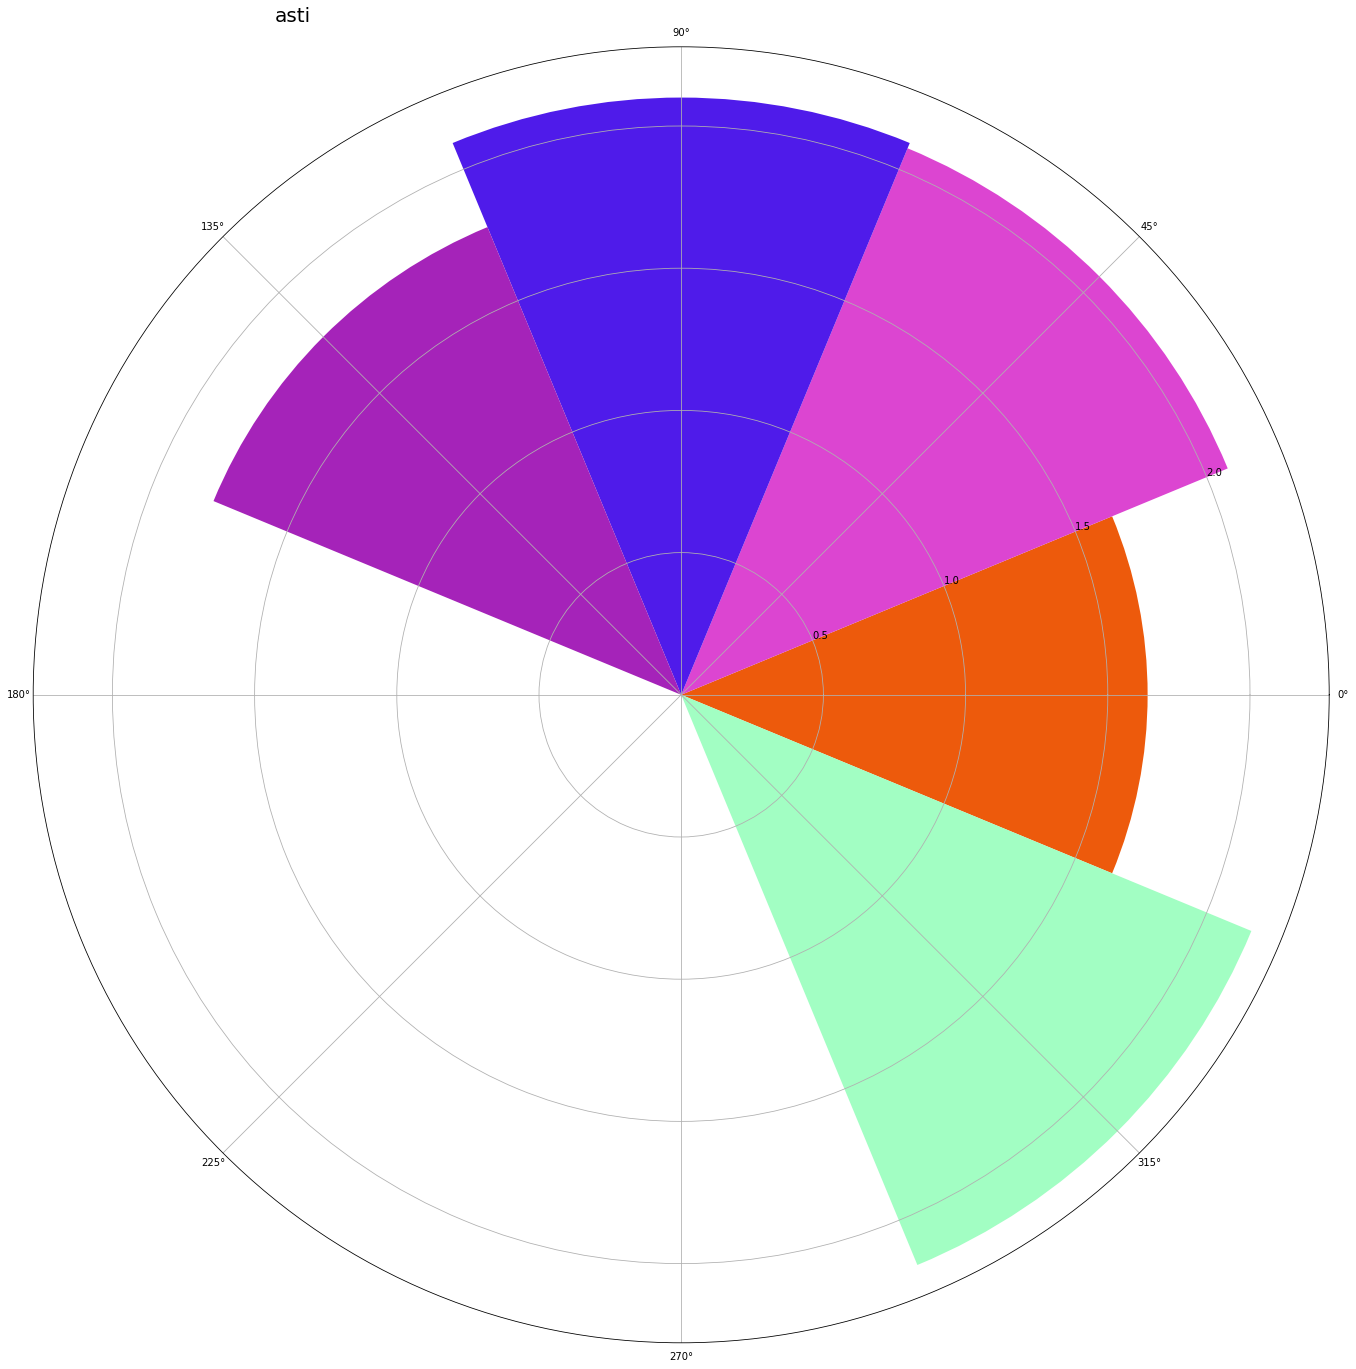

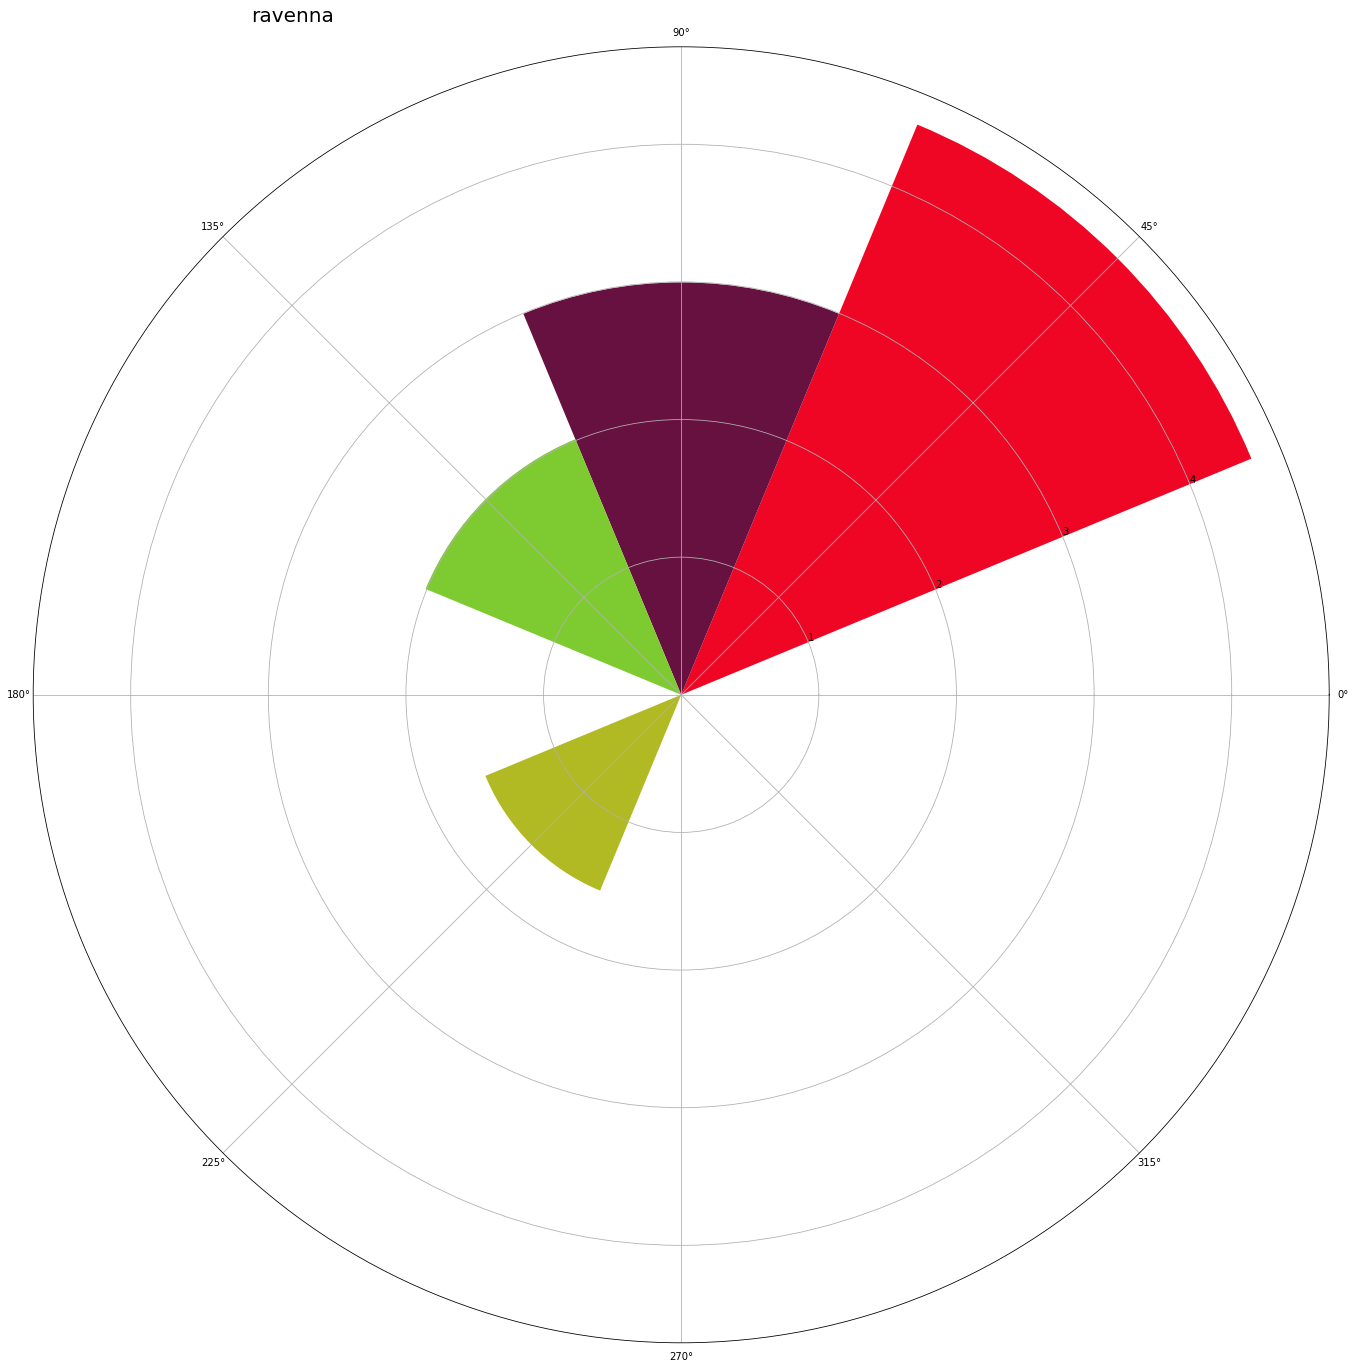

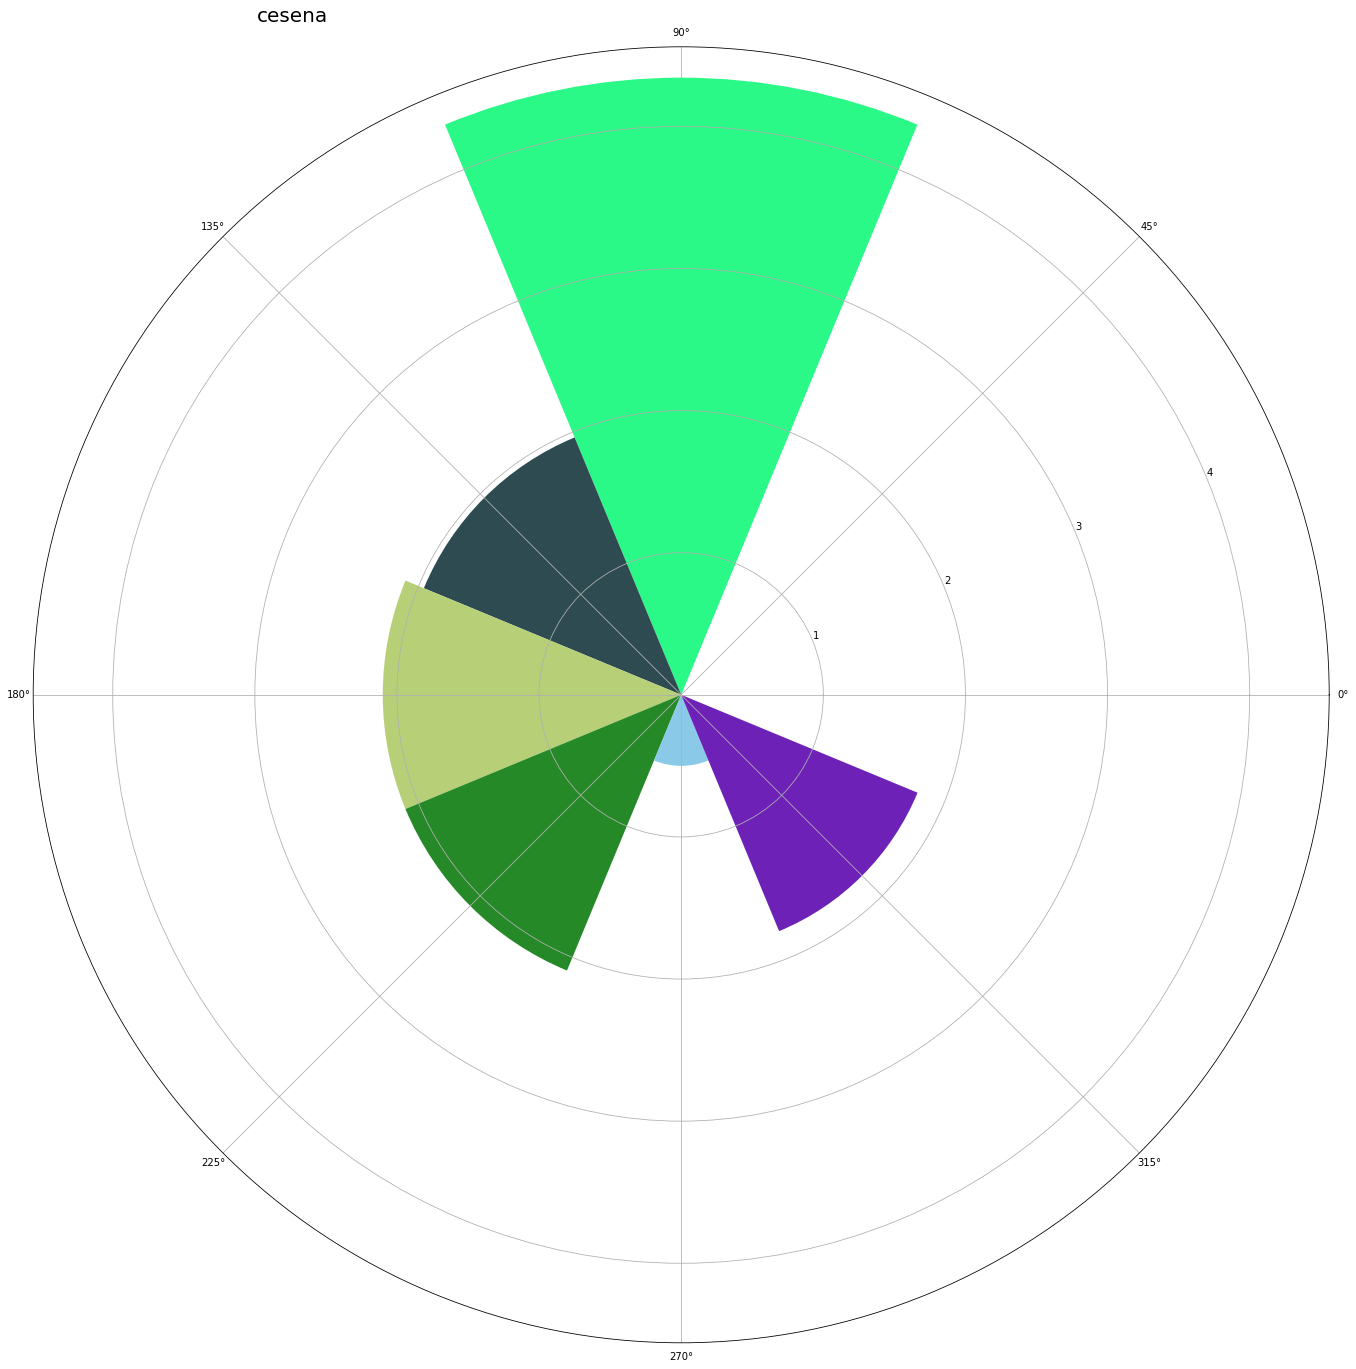

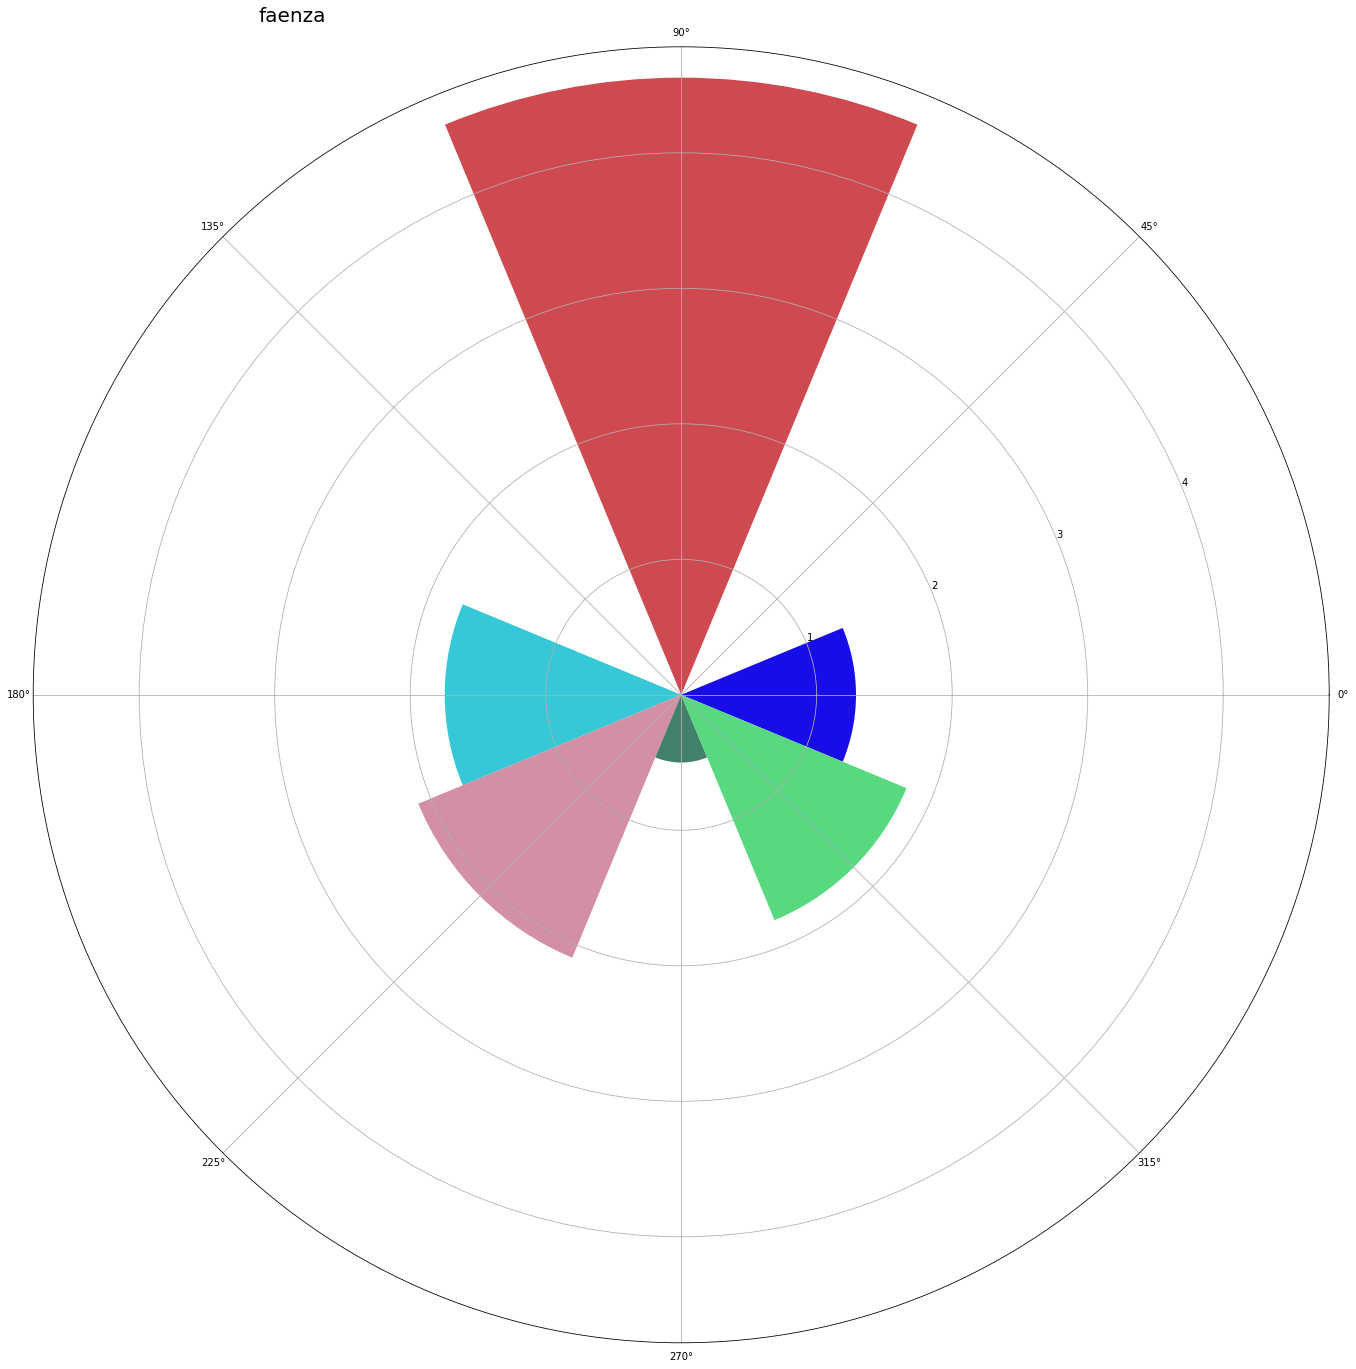

In [45]:
#查看所有城市风速和风向的关系
for index,x in enumerate(city_list):
    Wind_Speed(Speed(x),city_name[index]) 